<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/09_pytorch_model_deployment_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. PyTorch Model Deployment Exercises

Welcome to the 09. PyTorch Model Deployment exercises.

Your objective is to write code to satisify each of the exercises below.

Some starter code has been provided to make sure you have all the resources you need.

> **Note:** There may be more than one solution to each of the exercises.

## Resources

1. These exercises/solutions are based on [section 09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/jOX5ZCkWO-0) (but try the exercises yourself first!).
3. See [all solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

> **Note:** The first section of this notebook is dedicated to getting various helper functions and datasets used for the exercises. The exercises start at the heading "Exercise 1: ...".

### Get various imports and helper functions

The code in the following cells prepares imports and data for the exercises below. They are taken from [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/).

In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) > 1, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    # !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")


torch version: 2.4.0+cu124
torchvision version: 0.19.0+cu124


In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    # !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get data

Want to download the data we've been using in PyTorch Model Deployment: https://www.learnpytorch.io/09_pytorch_model_deployment/#1-getting-data

In [ ]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

In [ ]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

### Preprocess data

Turn images into tensors using same code as PyTorch Paper Replicating section 2.1 and 2.2: https://www.learnpytorch.io/08_pytorch_paper_replicating/#21-prepare-transforms-for-images

In [ ]:
# Create image size (from Table 3 in the ViT paper)
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [ ]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x723ade1e2c60>,
 ['pizza', 'steak', 'sushi'])

In [ ]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

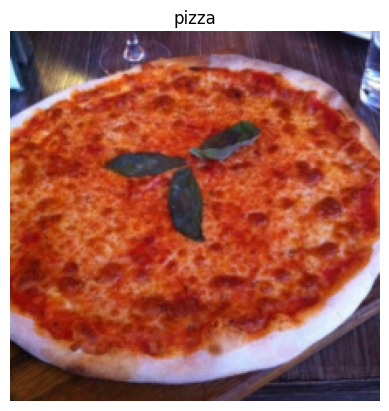

In [ ]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

## Exercise 1. Make and time predictions with both feature extractor models on the test dataset using the GPU (`device="cuda"`).

* Compare the model's prediction times on GPU vs CPU - does this close the gap between them? As in, does making predictions on the GPU make the ViT feature extractor prediction times closer to the EffNetB2 feature extractor prediction times?
* You'll find code to do these steps in [section 5. Making predictions with our trained models and timing them](https://www.learnpytorch.io/09_pytorch_model_deployment/#5-making-predictions-with-our-trained-models-and-timing-them) and [section 6. Comparing model results, prediction times and size](https://www.learnpytorch.io/09_pytorch_model_deployment/#6-comparing-model-results-prediction-times-and-size).

In [ ]:
# TODO: your code

### 1. Prepare learning functions

In [ ]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy

In [ ]:
def train_step(model, dataloader, loss_fn, opt, acc_fn, device):
    dl_iter = iter(dataloader)
    avg_loss = 0
    acc = 0

    for _ in tqdm(range(len(dataloader)), leave=False, desc="Training"):
        batch, target = next(dl_iter)
        batch, target = batch.to(device), target.to(device)

        opt.zero_grad(set_to_none=True)
        out = model(batch)
        loss = loss_fn(out, target)
        loss.backward()
        opt.step()

        avg_loss += loss
        acc += acc_fn(out, target)

    return avg_loss / len(dataloader), acc / len(dataloader)

def valid_step(model, dataloader, loss_fn, acc_fn, device):
    dl_iter = iter(dataloader)
    avg_loss = 0
    acc = 0

    for _ in tqdm(range(len(dataloader)), leave=False, desc="Validation"):
        batch, target = next(dl_iter)
        batch, target = batch.to(device), target.to(device)

        with torch.inference_mode():
            out = model(batch)
            loss = loss_fn(out, target)

        avg_loss += loss
        acc += acc_fn(out, target)

    return avg_loss / len(dataloader), acc / len(dataloader)

In [ ]:
classes = train_dataloader.dataset.classes
classes

['pizza', 'steak', 'sushi']

In [ ]:
def train(model, train_dl, valid_dl, loss_fn, opt, epochs, device):
    model.to(device)
    model.eval() # It doesn't change anything for ViT, but helps a lot EffNet
    acc_fn = Accuracy(task="multiclass", num_classes=len(train_dl.dataset.classes)).to(device)

    for epoch in tqdm(range(epochs), desc="Epoch"):
        train_loss, train_acc = train_step(model, train_dl, loss_fn, opt, acc_fn, device)
        valid_loss, valid_acc = valid_step(model, valid_dl, loss_fn, acc_fn, device)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"valid_loss: {valid_loss:.4f} | "
            f"valid_acc: {valid_acc:.4f} | "
        )

### 2. Prepare EffNetB2

In [ ]:
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights)
for param in effnetb2.parameters():
    param.requires_grad = False

effnetb2.classifier = nn.Linear(1408, 3)

In [ ]:
# summary(effnetb2, input_size=(32, 3, 224, 224), col_names=["input_size", "num_params", "trainable"], row_settings=["var_names"])

In [ ]:
opt = torch.optim.Adam(effnetb2.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
train(effnetb2, train_dataloader, test_dataloader, loss_fn, opt, 10, device)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9429 | train_acc: 0.6602 | valid_loss: 0.7291 | valid_acc: 0.8778 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 0.5588 | train_acc: 0.9453 | valid_loss: 0.5076 | valid_acc: 0.9583 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 0.4602 | train_acc: 0.9570 | valid_loss: 0.4194 | valid_acc: 0.9280 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 0.2985 | train_acc: 0.9609 | valid_loss: 0.3823 | valid_acc: 0.8977 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 0.2423 | train_acc: 0.9609 | valid_loss: 0.3274 | valid_acc: 0.8977 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6 | train_loss: 0.2054 | train_acc: 0.9648 | valid_loss: 0.2983 | valid_acc: 0.9280 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7 | train_loss: 0.1841 | train_acc: 0.9648 | valid_loss: 0.2811 | valid_acc: 0.9280 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8 | train_loss: 0.1958 | train_acc: 0.9648 | valid_loss: 0.2753 | valid_acc: 0.9280 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9 | train_loss: 0.1493 | train_acc: 0.9648 | valid_loss: 0.2895 | valid_acc: 0.9081 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10 | train_loss: 0.1493 | train_acc: 0.9688 | valid_loss: 0.2767 | valid_acc: 0.9384 | 


### 3. Prepare ViT

In [ ]:
def create_vit(num_classes=3):
    vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    vit = torchvision.models.vit_b_16(weights=vit_weights)
    for param in vit.parameters():
        param.requires_grad = False

    vit.heads = nn.Linear(768, num_classes)
    return vit

vit = create_vit()

In [ ]:
# summary(vit, input_size=(32, 3, 224, 224), col_names=["input_size", "num_params", "trainable"], row_settings=["var_names"])

In [ ]:
opt = torch.optim.Adam(vit.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
train(vit, train_dataloader, test_dataloader, loss_fn, opt, 10, device)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8590 | train_acc: 0.7031 | valid_loss: 0.5646 | valid_acc: 0.8987 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 0.4663 | train_acc: 0.9062 | valid_loss: 0.4416 | valid_acc: 0.8674 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 0.3674 | train_acc: 0.9258 | valid_loss: 0.3423 | valid_acc: 0.8778 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 0.3263 | train_acc: 0.9609 | valid_loss: 0.2685 | valid_acc: 0.8977 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 0.2331 | train_acc: 0.9570 | valid_loss: 0.2769 | valid_acc: 0.8977 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 6 | train_loss: 0.1941 | train_acc: 0.9531 | valid_loss: 0.2919 | valid_acc: 0.9081 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 7 | train_loss: 0.1803 | train_acc: 0.9570 | valid_loss: 0.2561 | valid_acc: 0.8977 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 8 | train_loss: 0.1619 | train_acc: 0.9648 | valid_loss: 0.2294 | valid_acc: 0.9081 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 9 | train_loss: 0.1429 | train_acc: 0.9688 | valid_loss: 0.2204 | valid_acc: 0.9384 | 


Training:   0%|          | 0/8 [00:00<?, ?it/s]

Validation:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 10 | train_loss: 0.1365 | train_acc: 0.9688 | valid_loss: 0.2230 | valid_acc: 0.9384 | 


### 4. Compare times on inference on gpu

In [ ]:
import time
from PIL import Image
from pathlib import Path

images = list(Path("data/pizza_steak_sushi/test").glob("*/*.jpg"))
images[:5]

[PosixPath('data/pizza_steak_sushi/test/pizza/309892.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg')]

In [ ]:
def inference_timed(model, device):
    model.to(device)
    pred_list = []

    for image in images:
        pred_dict = {}
        start_time = time.time()

        batch = manual_transforms(Image.open(image))[None].to(device)

        with torch.inference_mode():
            out = model(batch)

        pred_dict["confidence"] = torch.max(torch.softmax(out, dim=1)).cpu().item()
        pred = torch.argmax(out, dim=1).item()
        pred_dict["prediction"] = classes[pred]
        pred_dict["correct"] = classes[pred] == image.parent.name

        end_time = time.time()
        pred_dict["time"] = round(end_time - start_time, 4)
        pred_list.append(pred_dict)

    return pred_list

In [ ]:
effnetb2_stats_gpu = inference_timed(effnetb2, "cuda")
vit_stats_gpu = inference_timed(vit, "cuda")
effnetb2_stats_cpu = inference_timed(effnetb2, "cpu")
vit_stats_cpu = inference_timed(vit, "cpu")

In [ ]:
import pandas as pd
effnetb2_avg_time_gpu = pd.DataFrame(effnetb2_stats_gpu).time.mean()
vit_avg_time_gpu = pd.DataFrame(vit_stats_gpu).time.mean()
effnetb2_avg_time_cpu = pd.DataFrame(effnetb2_stats_cpu).time.mean()
vit_avg_time_cpu = pd.DataFrame(vit_stats_cpu).time.mean()
print("Average prediction times on GPU:")
print(f"EffNetB2: {effnetb2_avg_time_gpu:.4f}, ViT: {vit_avg_time_gpu:.4f}\n")
print("Average prediction times on CPU:")
print(f"EffNetB2: {effnetb2_avg_time_cpu:.4f}, ViT: {vit_avg_time_cpu:.4f}")

Average prediction times on GPU:
EffNetB2: 0.0115, ViT: 0.0201

Average prediction times on CPU:
EffNetB2: 0.0430, ViT: 0.4713


In [ ]:
print("EffNetB2 to ViT time ratio on GPU:")
print(round(vit_avg_time_gpu / effnetb2_avg_time_gpu, 4))
print()
print("EffNetB2 to ViT time ratio on CPU:")
print(round(vit_avg_time_cpu / effnetb2_avg_time_cpu, 4))

EffNetB2 to ViT time ratio on GPU:
1.7472

EffNetB2 to ViT time ratio on CPU:
10.9494


### 5. Conclusion

Both models are faster during inference on gpu than on cpu, and the difference between those 2 models speed shrinks significantly

## Exercise 2. The ViT feature extractor seems to have more learning capacity (due to more parameters) than EffNetB2, how does it go on the larger 20% split of the entire Food101 dataset?

* Train a ViT feature extractor on the 20% Food101 dataset for 5 epochs, just like we did with EffNetB2 in section [10. Creating FoodVision Big](https://www.learnpytorch.io/09_pytorch_model_deployment/#10-creating-foodvision-big).

In [ ]:
# TODO: your code

In [ ]:
import os
from torchvision.transforms import v2
from torch.utils.data import random_split, DataLoader
import pandas as pd

In [ ]:
vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
train_transform = v2.Compose([
    v2.TrivialAugmentWide(),
    vit_weights.transforms()
])
train_transform

Compose(
      TrivialAugmentWide(interpolation=InterpolationMode.NEAREST, num_magnitude_bins=31)
      ImageClassification(
      crop_size=[224]
      resize_size=[256]
      mean=[0.485, 0.456, 0.406]
      std=[0.229, 0.224, 0.225]
      interpolation=InterpolationMode.BILINEAR
  )
)

In [ ]:
train_ds = torchvision.datasets.Food101("data", split="train", transform=train_transform, download=True)
valid_ds = torchvision.datasets.Food101("data", split="test", transform=vit_weights.transforms())

train_ds, _ = random_split(train_ds, [0.2, 0.8])
valid_ds, _ = random_split(valid_ds, [0.2, 0.8])

In [ ]:
train_ds.classes = train_ds.dataset.classes # to make it work with my train function

In [ ]:
num_workers = os.cpu_count() // 2
BATCH_SIZE = 32
num_workers

6

In [ ]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE, num_workers=num_workers, pin_memory=True)

In [ ]:
vit = create_vit(num_classes=101)
opt = torch.optim.Adam(vit.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
train(vit, train_dl, valid_dl, loss_fn, opt, 5, device)

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/474 [00:00<?, ?it/s]

Validation:   0%|          | 0/158 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.4684 | train_acc: 0.4263 | valid_loss: 1.4736 | valid_acc: 0.6183 | 


Training:   0%|          | 0/474 [00:00<?, ?it/s]

Validation:   0%|          | 0/158 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 1.6694 | train_acc: 0.5793 | valid_loss: 1.2599 | valid_acc: 0.6643 | 


Training:   0%|          | 0/474 [00:00<?, ?it/s]

Validation:   0%|          | 0/158 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 1.4446 | train_acc: 0.6372 | valid_loss: 1.1837 | valid_acc: 0.6755 | 


Training:   0%|          | 0/474 [00:00<?, ?it/s]

Validation:   0%|          | 0/158 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 1.3180 | train_acc: 0.6676 | valid_loss: 1.1243 | valid_acc: 0.6891 | 


Training:   0%|          | 0/474 [00:00<?, ?it/s]

Validation:   0%|          | 0/158 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 1.2229 | train_acc: 0.6907 | valid_loss: 1.0991 | valid_acc: 0.6973 | 


## Exercise 3. Make predictions across the 20% Food101 test dataset with the ViT feature extractor from exercise 2 and find the "most wrong" predictions
* The predictions will be the ones with the highest prediction probability but with the wrong predicted label.
* Write a sentence or two about why you think the model got these predictions wrong.

In [ ]:
# TODO: your code

In [ ]:
vit.to(device)
valid_dl_iter = iter(valid_dl)
stats = {"Prediction": [],
         "Truth": [],
         "Confidence": [],
         "Correct": [],
         "Images": []}

for _ in tqdm(range(len(valid_dl))):
    batch, target = next(valid_dl_iter)
    batch, target = batch.to(device), target.to(device)

    with torch.inference_mode():
        out = vit(batch)

    # preds = torch.argmax(out, dim=1)
    probs, preds = torch.max(torch.softmax(out, dim=1), dim=1)
    correct = preds == target
    # print(batch.cpu().numpy())
    stats["Prediction"].extend(train_ds.classes[pred] for pred in preds.cpu().numpy())
    stats["Truth"].extend(train_ds.classes[t] for t in target.cpu().numpy())
    stats["Confidence"].extend(probs.cpu().numpy())
    stats["Correct"].extend(correct.cpu().numpy())
    stats["Images"].extend(batch.cpu().numpy())

  0%|          | 0/158 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame([stats["Prediction"], stats["Truth"], stats["Confidence"], stats["Correct"]],
                  index=["Prediction", "Truth", "Confidence", "Correct"]).T
df = df.sort_values(["Correct", "Confidence"], ascending=[True, False]).head()
df

,Prediction,Truth,Confidence,Correct
391,cheese_plate,omelette,0.979172,False
3786,spaghetti_carbonara,pad_thai,0.964658,False
2873,takoyaki,oysters,0.959634,False
3661,onion_rings,churros,0.95314,False
2804,breakfast_burrito,omelette,0.953059,False


In [ ]:
# valid_ds[idx][0].numpy()
# preds = preds.cpu().numpy()
train_ds.classes[preds.astype(int)]
preds.astype(int)

array([ 8, 44, 46, 67, 51, 82, 83, 86, 78, 49, 94, 33,  5, 89, 44,  8, 96,
       89, 58, 69, 49, 68, 35,  8, 30, 75])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.7418136649970393e-09..1.0000000076293944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.003921562194824202..1.0000000236034394].


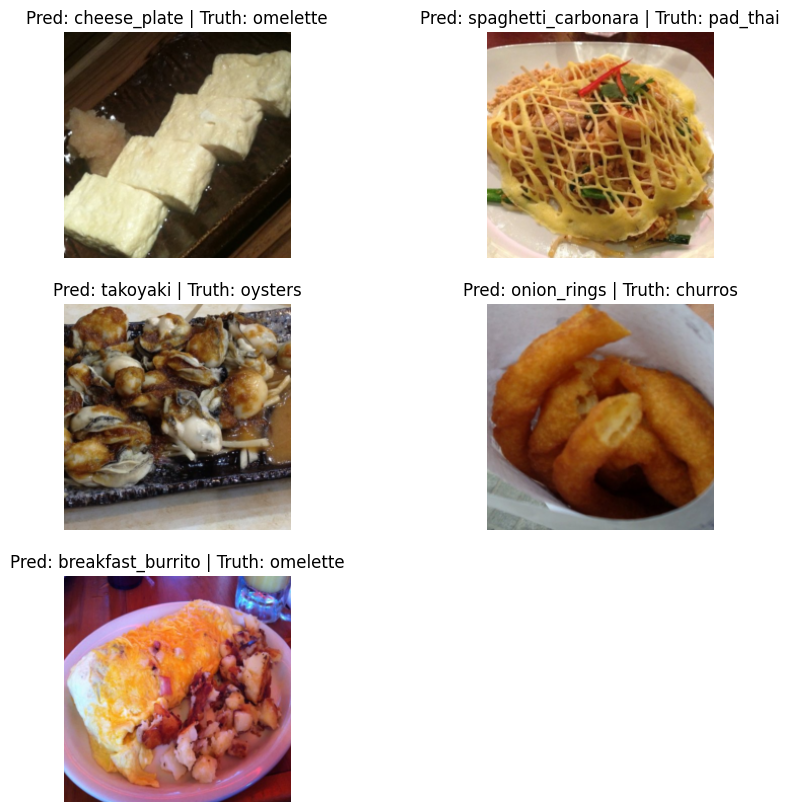

In [ ]:
import numpy as np
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
fig = plt.figure(figsize=(10,10))

for i, idx in enumerate(df.index.to_numpy()):
    # denormalize
    img = stats["Images"][idx]
    img = (img * std[:, None, None]) + mean[:, None, None]

    ax = fig.add_subplot(3, 2, i+1)
    ax.imshow(img.transpose(1, 2, 0))
    ax.axis(False)
    ax.set_title(f"Pred: {stats["Prediction"][idx]} | Truth: {stats["Truth"][idx]}")

I am not a food expert, however those predictions seem reasonable to me, I guess some food may be hard to recognize solely by its image.

## Exercise 4. Evaluate the ViT feature extractor across the whole Food101 test dataset rather than just the 20% version, how does it perform?
* Does it beat the original Food101 paper's best result of 56.4% accuracy?

In [ ]:
# TODO: your code
valid_ds = torchvision.datasets.Food101("data", split="test", transform=vit_weights.transforms())
valid_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE, num_workers=num_workers, pin_memory=True)

In [ ]:
acc_fn = Accuracy(task="multiclass", num_classes=101).to(device)

In [ ]:
loss, accuracy = valid_step(vit, valid_dl, loss_fn, acc_fn, device)

Validation:   0%|          | 0/790 [00:00<?, ?it/s]

In [ ]:
print(f"Loss: {loss}, Accuracy: {accuracy}")

Loss: 1.1039025783538818, Accuracy: 0.700672447681427


It performs just as well as on 20% version, it easly beats original Food101 paper's best result of 56.4% accuracy

## Exercise 5. Head to [Paperswithcode.com](https://paperswithcode.com/) and find the current best performing model on the Food101 dataset.
* What model architecture does it use?

In [ ]:
# TODO: your answer to the above

Current best performing model on Food101, documented on Paperswithcode is ViTB/16 trained on Bamboo dataset.

## Exercise 6. Write down 1-3 potential failure points of our deployed FoodVision models and what some potential solutions might be.
* For example, what happens if someone was to upload a photo that wasn't of food to our FoodVision Mini model?

In [ ]:
# TODO: your answer to the above

- out of domain images - if we upload a picture of food that is not among classes the uploaded model knows or an image that is not a food at all, the model will get lost. My potential solution would be to set some arbitrary treshold, such that if confidence of the model about some prediction is not above it - the model outputs that it doesn't know what is on the image.
- I had some more ideas like problems with poor quality images or incorrectly labeled samples in dataset, but nothing significant / worth analysing here